In [1]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle 


In [2]:
train_data = pd.read_csv(r'C:\Users\heman\OneDrive\Desktop\Intelligent systems\archive\fraudTest.csv')
test_data = pd.read_csv(r'C:\Users\heman\OneDrive\Desktop\Intelligent systems\archive\fraudTrain.csv')


In [3]:
print("NaNs in train_data", np.sum(np.sum(train_data.isna(), axis=0))) 
print("NaNs in test_data", np.sum(np.sum(test_data.isna(), axis=0)))

NaNs in train_data 0
NaNs in test_data 0


In [4]:
print("Nulls in train_data", np.sum(np.sum(train_data.isnull(), axis=0))) 
print("Nulls in test_data", np.sum(np.sum(test_data.isnull(), axis=0)))

Nulls in train_data 0
Nulls in test_data 0


In [5]:
print("train_data Info:")
print(train_data.info())
print("\ntest_data Info:")
print(test_data.info())

train_data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long               

In [6]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


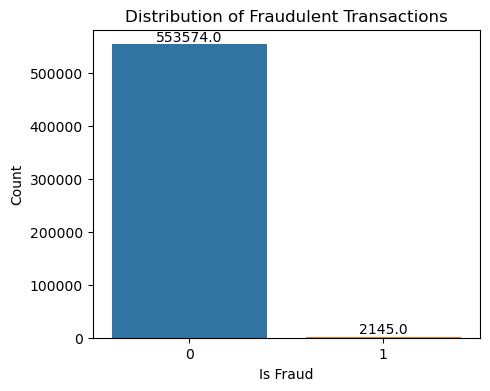

In [7]:
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='is_fraud', data=train_data)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


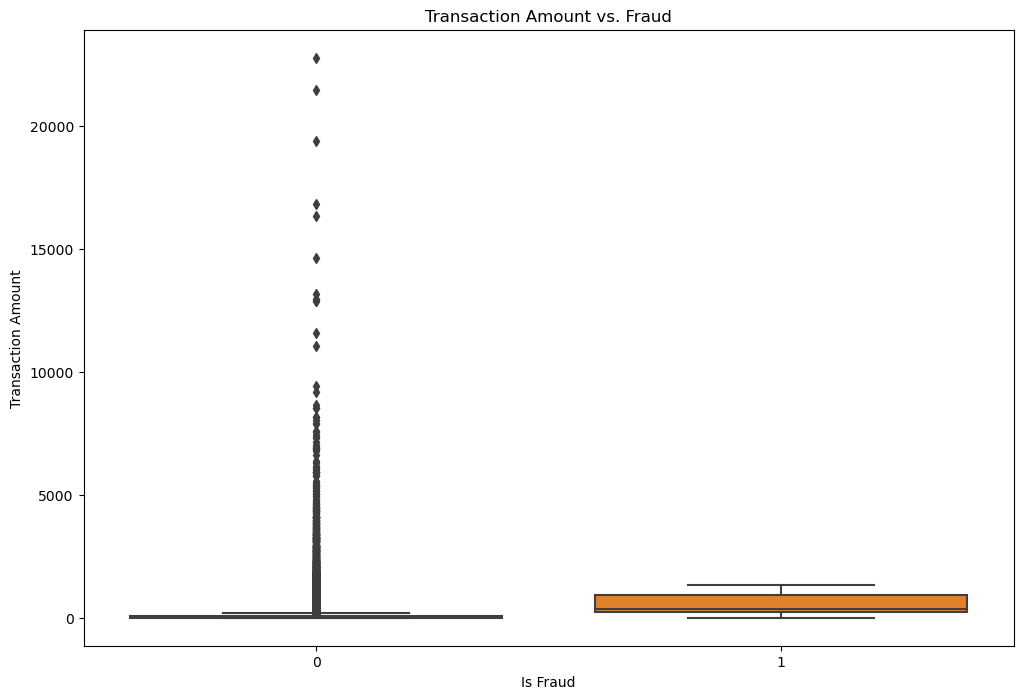

In [8]:
# Exploring the distribution of transaction amounts by fraud status
plt.figure(figsize=(12, 8))
sns.boxplot(x='is_fraud', y='amt', data=train_data)
plt.title('Transaction Amount vs. Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()

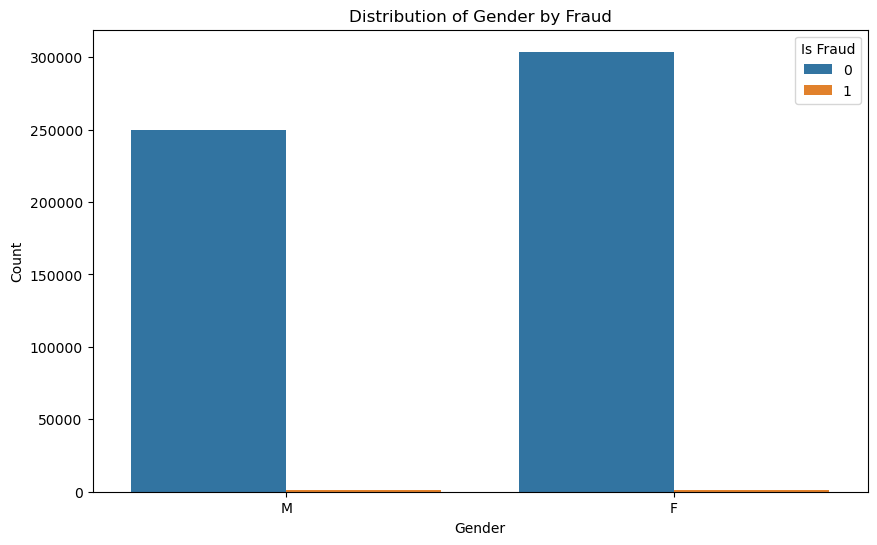

In [9]:

train_data['gender'] = train_data['gender'].astype(str)
train_data['is_fraud'] = train_data['is_fraud'].astype(str)
# Plot the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='is_fraud', data=train_data)
plt.title('Distribution of Gender by Fraud')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()


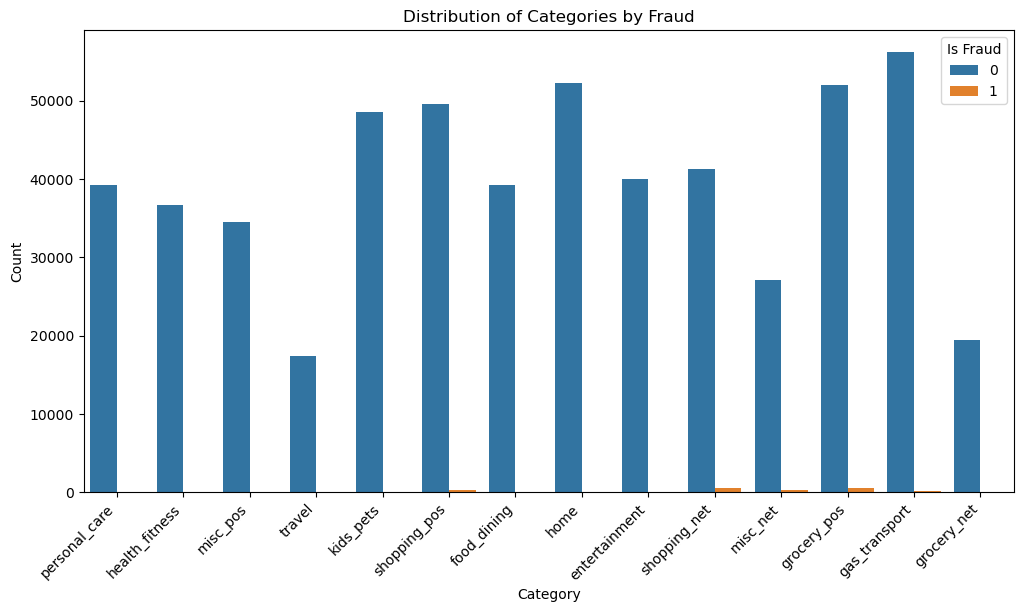

In [10]:
# Exploring categorical features (e.g., category)
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=train_data)
plt.title('Distribution of Categories by Fraud')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Is Fraud')
plt.show()

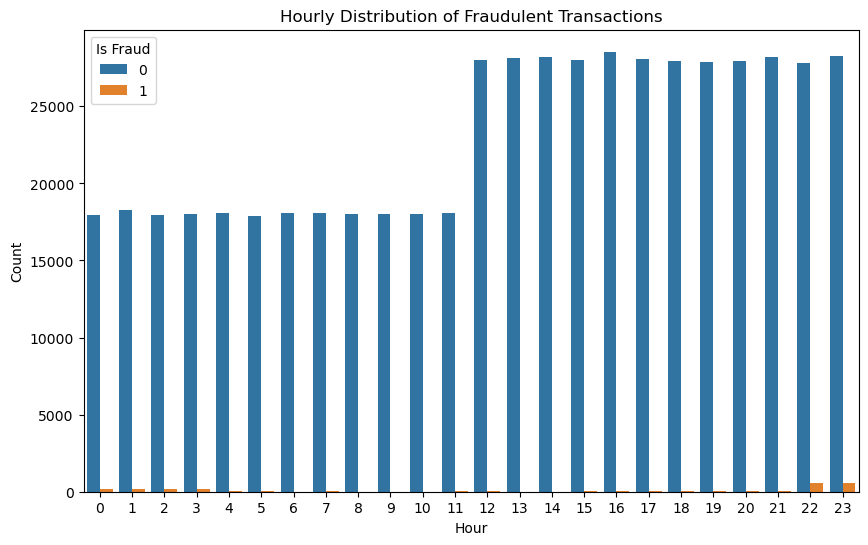

In [11]:
# Time analysis: Extract hours and days from 'trans_date_trans_time'
train_data['trans_hour'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.hour
train_data['trans_day'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.dayofweek

# Plot hourly distribution of fraud
plt.figure(figsize=(10, 6))
sns.countplot(x='trans_hour', hue='is_fraud', data=train_data)
plt.title('Hourly Distribution of Fraudulent Transactions')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

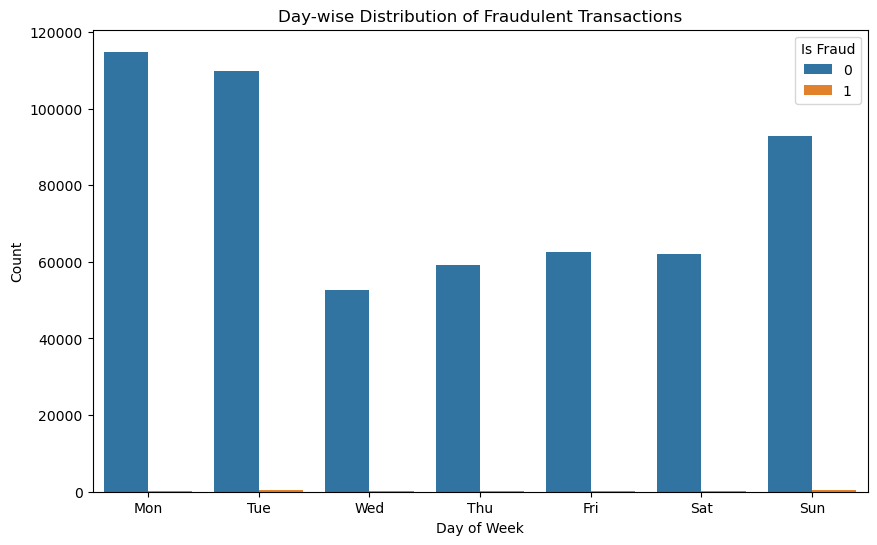

In [12]:
# Plot day-wise distribution of fraud
plt.figure(figsize=(10, 6))
sns.countplot(x='trans_day', hue='is_fraud', data=train_data)
plt.title('Day-wise Distribution of Fraudulent Transactions')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Is Fraud')
plt.show()



In [13]:
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Encode categorical variables
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
categorical_cols = ['gender', 'category', 'state']
encoded_train_features = encoder.fit_transform(train_data[categorical_cols]).toarray()
encoded_test_features = encoder.transform(test_data[categorical_cols]).toarray()

# Feature scaling
scaler = StandardScaler()
numerical_cols = ['amt', 'lat', 'long','city_pop', 'unix_time', 'merch_lat', 'merch_long']
scaled_train_features = scaler.fit_transform(train_data[numerical_cols])
scaled_test_features = scaler.transform(test_data[numerical_cols])

# Concatenate encoded and scaled features for both train and test data
final_train_features = pd.concat([pd.DataFrame(encoded_train_features), pd.DataFrame(scaled_train_features)], axis=1)
final_test_features = pd.concat([pd.DataFrame(encoded_test_features), pd.DataFrame(scaled_test_features)], axis=1)

# Define target variables
train_target = train_data['is_fraud']
test_target = test_data['is_fraud']

combined_data = pd.concat([train_data, test_data])
encoded_features = encoder.fit_transform(combined_data[categorical_cols]).toarray()


C:\Users\heman\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [14]:
# Generating synthetic data to balance the imbalanced dataset
smote = SMOTE(random_state=36)

x_train_resample, y_train_resample = smote.fit_resample(final_train_features, train_target)

In [15]:
# from sklearn.utils import shuffle
X_shuffled, y_shuffled = shuffle(x_train_resample, y_train_resample, random_state=42)

In [16]:
# from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(X_shuffled, y_shuffled, test_size=0.5)

In [17]:
# for the initial selection process we will use a tiny
# portion of the actual training dataset
x_train_copy = x_train
y_train_copy = y_train

x_train = x_train[:10000]
y_train = y_train[:10000]

In [18]:
# Train Random Forest model
# from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
# Make predictions on test data
rf_predictions = rf_model.predict(x_validation)

# Calculate evaluation metrics on test data
rf_accuracy = accuracy_score(y_validation, rf_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("Random Forest Accuracy: {:.3f}%".format(rf_accuracy * 100))


Random Forest Accuracy: 98.601%


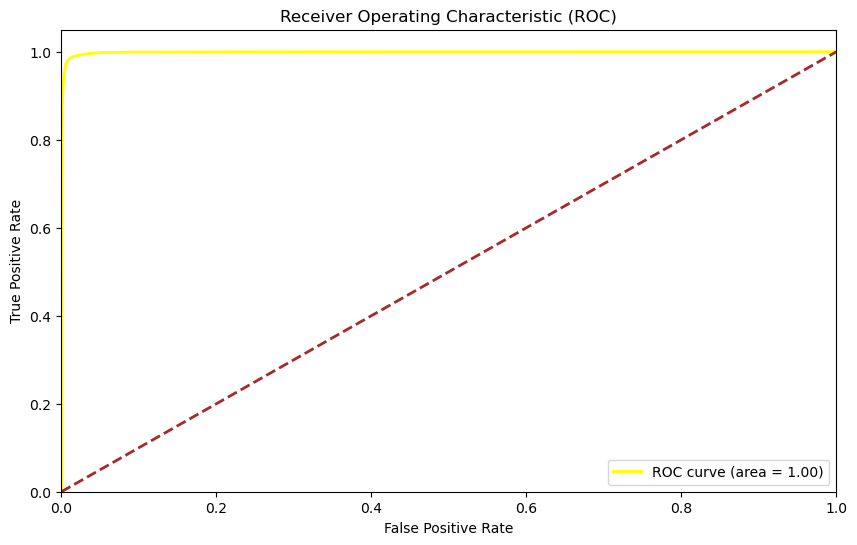

In [19]:

y_validation_binary = y_validation.astype(int)  

# Calculate ROC curve and AUC
probs = rf_model.predict_proba(x_validation)[:, 1]
fpr, tpr, thresholds = roc_curve(y_validation_binary, probs, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='yellow', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='brown', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [20]:
# Train SVM model
# from sklearn.svm import SVC
svm_model = SVC(kernel='poly')
svm_model.fit(x_train, y_train)

# Make predictions on test data
svm_predictions = svm_model.predict(x_validation)

# Calculate evaluation metrics on test datadeci
svm_accuracy = accuracy_score(y_validation, svm_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("SVM Accuracy: {:.3f}%".format(svm_accuracy * 100))

SVM Accuracy: 86.250%


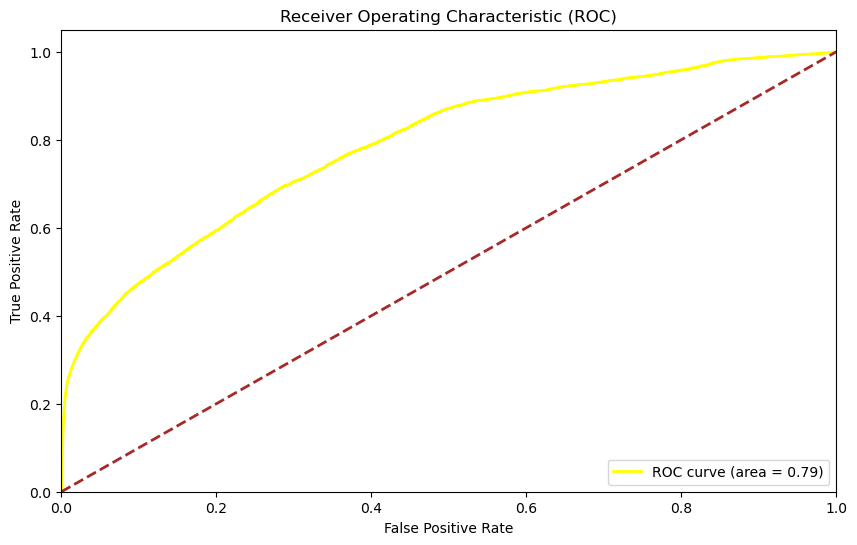

In [21]:
# Calculate decision scores for the positive class
decision_scores = svm_model.decision_function(final_test_features)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_target, decision_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='yellow', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='brown', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [22]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_predictions = knn_model.predict(x_validation)
knn_accuracy = accuracy_score(y_validation, knn_predictions)
print("KNN Accuracy: {:.3f}%".format(knn_accuracy * 100))

KNN Accuracy: 91.876%


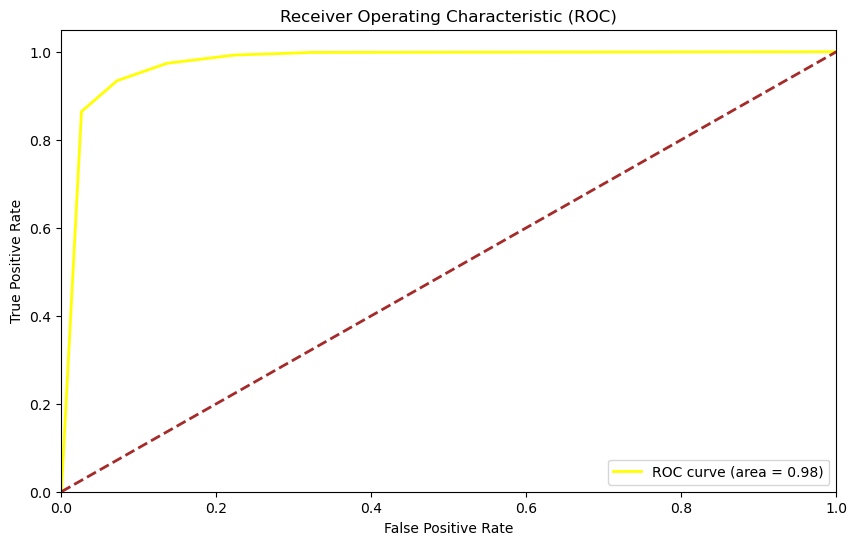

In [23]:
y_validation_binary = y_validation.astype(int)
probs = knn_model.predict_proba(x_validation)[:, 1]
fpr, tpr, thresholds = roc_curve(y_validation_binary, probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='yellow', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='brown', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
